In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/canola-dataset/.xlsx


In [2]:
import pandas as pd

# Load the Excel file
file_path = '/kaggle/input/canola-dataset/.xlsx'  # Update this path
excel_data = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure of the Excel file
sheet_names = excel_data.sheet_names
print(sheet_names)

# Load a specific sheet into a dataframe
df = pd.read_excel(file_path, sheet_name=sheet_names[0])  # Update sheet name if necessary
print(df.head())


['Sheet1']
   R  I  G  Height to 1st Branch  No. of Branch  No. of pods  Oil %  \
0  1  1  1                 31.20           4.20   253.333333   44.4   
1  1  1  2                 27.00           4.00   217.400000   45.0   
2  1  1  3                 35.25           4.00   176.500000   43.2   
3  1  1  4                 30.33           6.30   177.670000   43.5   
4  1  1  5                 29.00           5.25   189.800000   43.0   

   Protein %     SI  Yield/f (t)  SY/PL(g) Unnamed: 11  
0       25.6  3.580      1.89000   22.8000          Ha  
1       25.7  3.405      2.03079   19.5660          Hb  
2       24.0  3.935      2.00000   15.8850          Hc  
3       24.2  4.940      2.05000   15.9903          Hd  
4       26.0  3.595      1.86000   17.0820          He  


In [3]:
# Basic Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Data types
print("\nData Types:")
print(df.dtypes)

Descriptive Statistics:
               R          I          G  Height to 1st Branch  No. of Branch  \
count  78.000000  78.000000  78.000000             78.000000      78.000000   
mean    2.000000   1.500000   7.000000             25.818598       3.763077   
std     0.821781   0.503236   3.765875              6.021817       0.741790   
min     1.000000   1.000000   1.000000             12.250000       2.400000   
25%     1.000000   1.000000   4.000000             21.675000       3.400000   
50%     2.000000   1.500000   7.000000             25.465000       3.685000   
75%     3.000000   2.000000  10.000000             30.000000       4.000000   
max     3.000000   2.000000  13.000000             41.000000       6.300000   

       No. of pods      Oil %  Protein %         SI  Yield/f (t)   SY/PL(g)  
count    78.000000  78.000000  78.000000  78.000000    78.000000  78.000000  
mean    193.071196  43.866667  24.730769   3.366603     1.781715  15.463524  
std      36.876469   0.962635 

In [4]:
df_numeric = df.drop(columns=['Unnamed: 11'])

Descriptive Statistics:
               R          I          G  Height to 1st Branch  No. of Branch  \
count  78.000000  78.000000  78.000000             78.000000      78.000000   
mean    2.000000   1.500000   7.000000             25.818598       3.763077   
std     0.821781   0.503236   3.765875              6.021817       0.741790   
min     1.000000   1.000000   1.000000             12.250000       2.400000   
25%     1.000000   1.000000   4.000000             21.675000       3.400000   
50%     2.000000   1.500000   7.000000             25.465000       3.685000   
75%     3.000000   2.000000  10.000000             30.000000       4.000000   
max     3.000000   2.000000  13.000000             41.000000       6.300000   

       No. of pods      Oil %  Protein %         SI  Yield/f (t)   SY/PL(g)  
count    78.000000  78.000000  78.000000  78.000000    78.000000  78.000000  
mean    193.071196  43.866667  24.730769   3.366603     1.781715  15.463524  
std      36.876469   0.962635 

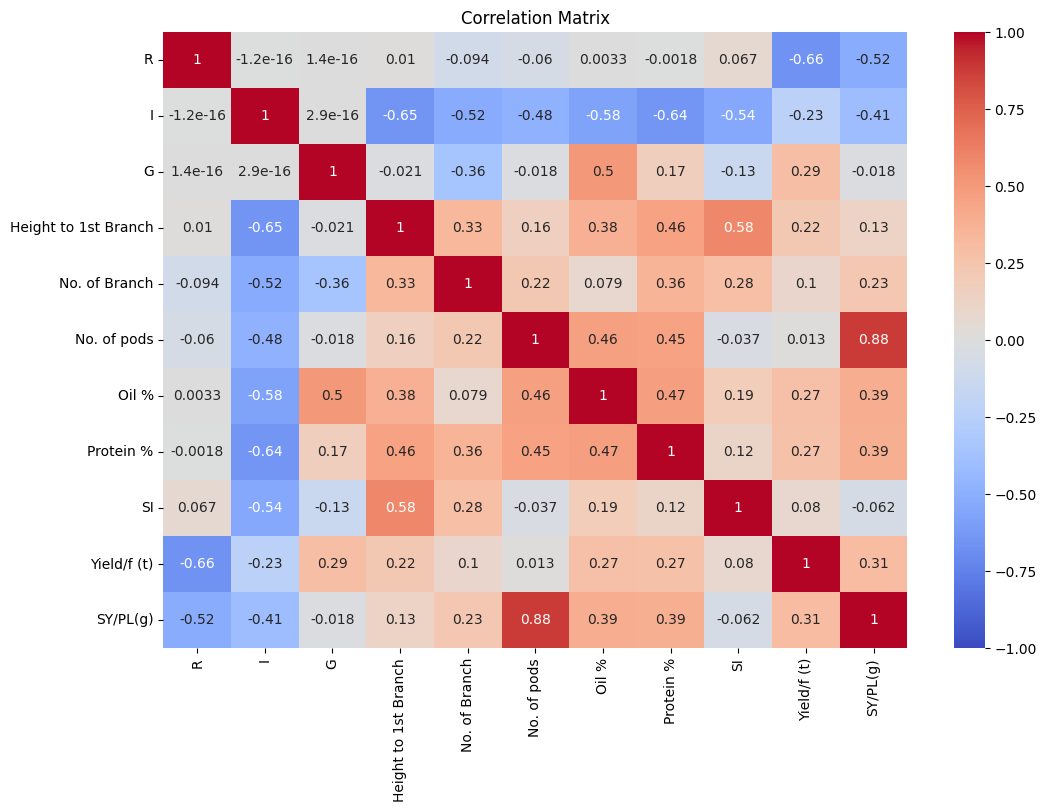

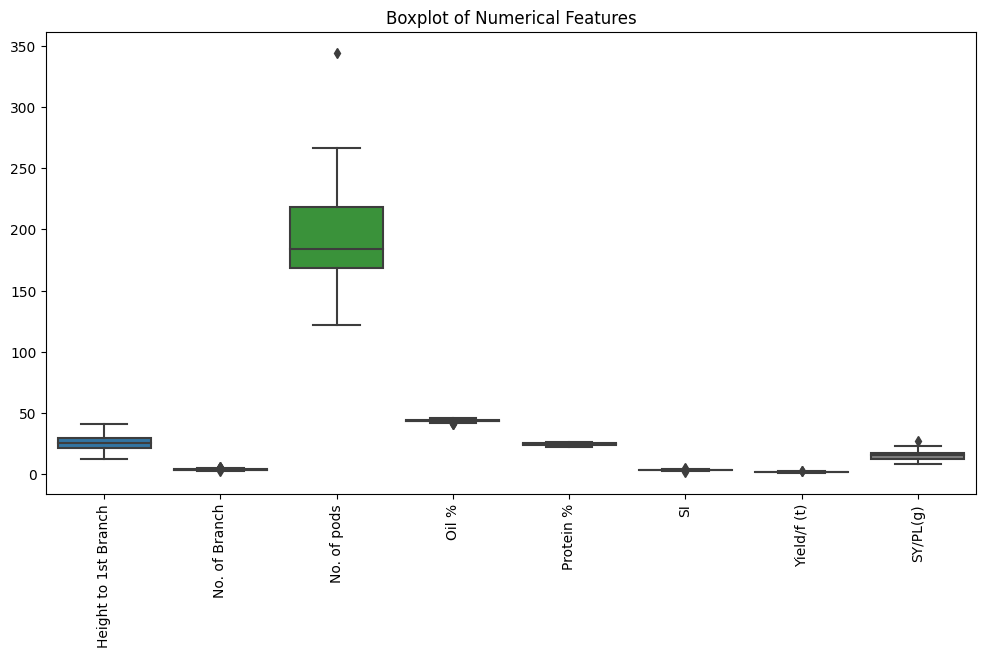

<Figure size 1200x600 with 0 Axes>

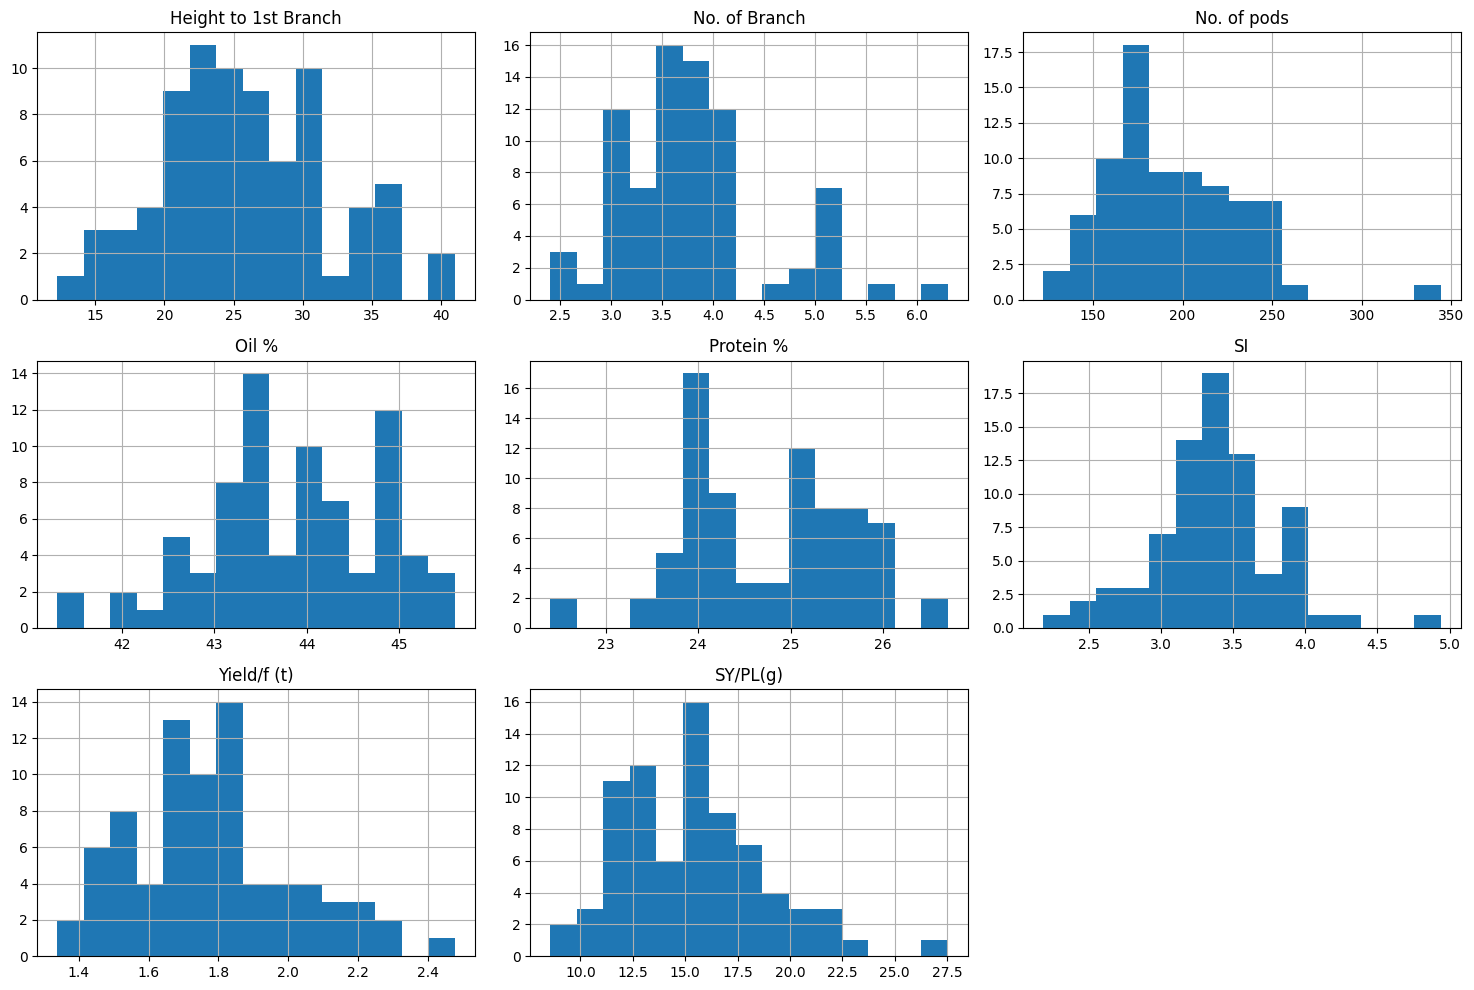

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Descriptive Statistics:")
print(df_numeric.describe())

# Check for missing values
print("\nMissing Values:")
print(df_numeric.isnull().sum())

# Data types
print("\nData Types:")
print(df_numeric.dtypes)

# Correlation matrix
print("\nCorrelation Matrix:")
print(df_numeric.corr())

# Visualizations
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric.drop(columns=['R', 'I', 'G']))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
df_numeric.drop(columns=['R', 'I', 'G']).hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()


Correlation Matrix:
                                 R             I             G  \
R                     1.000000e+00 -1.220279e-16  1.416351e-16   
I                    -1.220279e-16  1.000000e+00  2.891114e-16   
G                     1.416351e-16  2.891114e-16  1.000000e+00   
Height to 1st Branch  1.002510e-02 -6.487285e-01 -2.094347e-02   
No. of Branch        -9.373991e-02 -5.239396e-01 -3.589515e-01   
No. of pods          -5.959329e-02 -4.810651e-01 -1.790243e-02   
Oil %                 3.283380e-03 -5.763868e-01  5.001116e-01   
Protein %            -1.765363e-03 -6.428702e-01  1.698881e-01   
SI                    6.698513e-02 -5.403152e-01 -1.330101e-01   
Yield/f (t)          -6.588085e-01 -2.335478e-01  2.924259e-01   
SY/PL(g)             -5.177332e-01 -4.133122e-01 -1.751247e-02   

                      Height to 1st Branch  No. of Branch  No. of pods  \
R                                 0.010025      -0.093740    -0.059593   
I                                -0.64

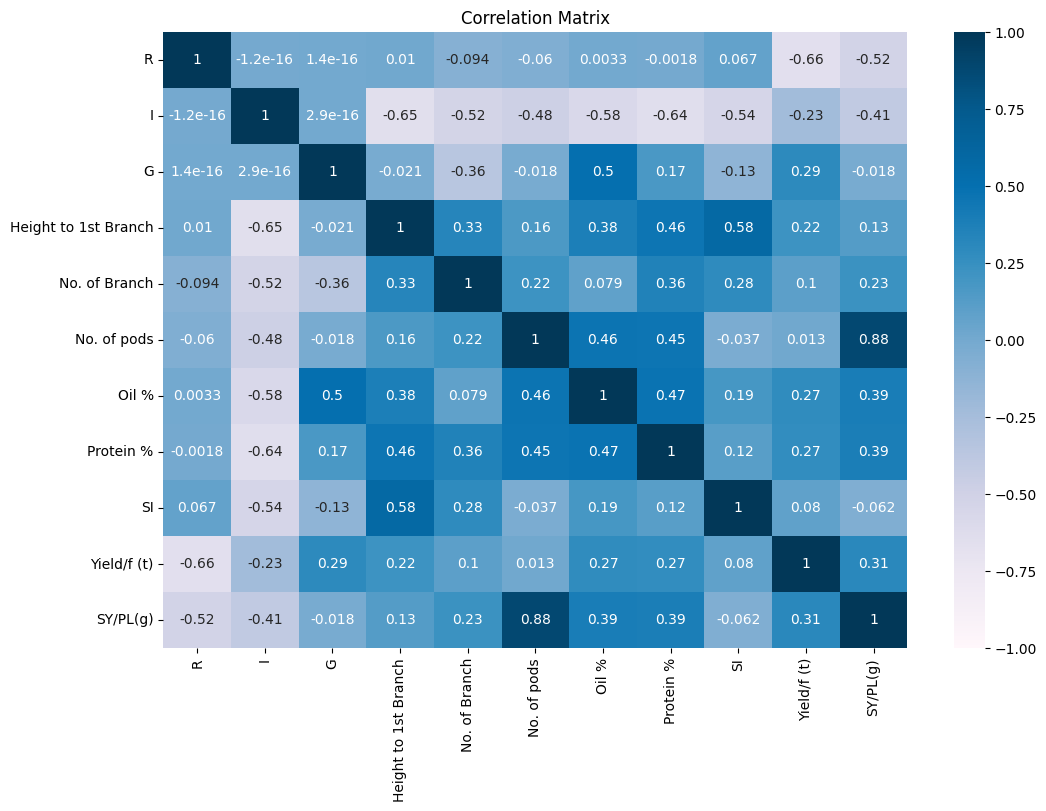

In [6]:
# Correlation matrix
print("\nCorrelation Matrix:")
print(df_numeric.corr())

# Visualizations
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='PuBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()



Correlation Matrix:
                                 R             I             G  \
R                     1.000000e+00 -1.220279e-16  1.416351e-16   
I                    -1.220279e-16  1.000000e+00  2.891114e-16   
G                     1.416351e-16  2.891114e-16  1.000000e+00   
Height to 1st Branch  1.002510e-02 -6.487285e-01 -2.094347e-02   
No. of Branch        -9.373991e-02 -5.239396e-01 -3.589515e-01   
No. of pods          -5.959329e-02 -4.810651e-01 -1.790243e-02   
Oil %                 3.283380e-03 -5.763868e-01  5.001116e-01   
Protein %            -1.765363e-03 -6.428702e-01  1.698881e-01   
SI                    6.698513e-02 -5.403152e-01 -1.330101e-01   
Yield/f (t)          -6.588085e-01 -2.335478e-01  2.924259e-01   
SY/PL(g)             -5.177332e-01 -4.133122e-01 -1.751247e-02   

                      Height to 1st Branch  No. of Branch  No. of pods  \
R                                 0.010025      -0.093740    -0.059593   
I                                -0.64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

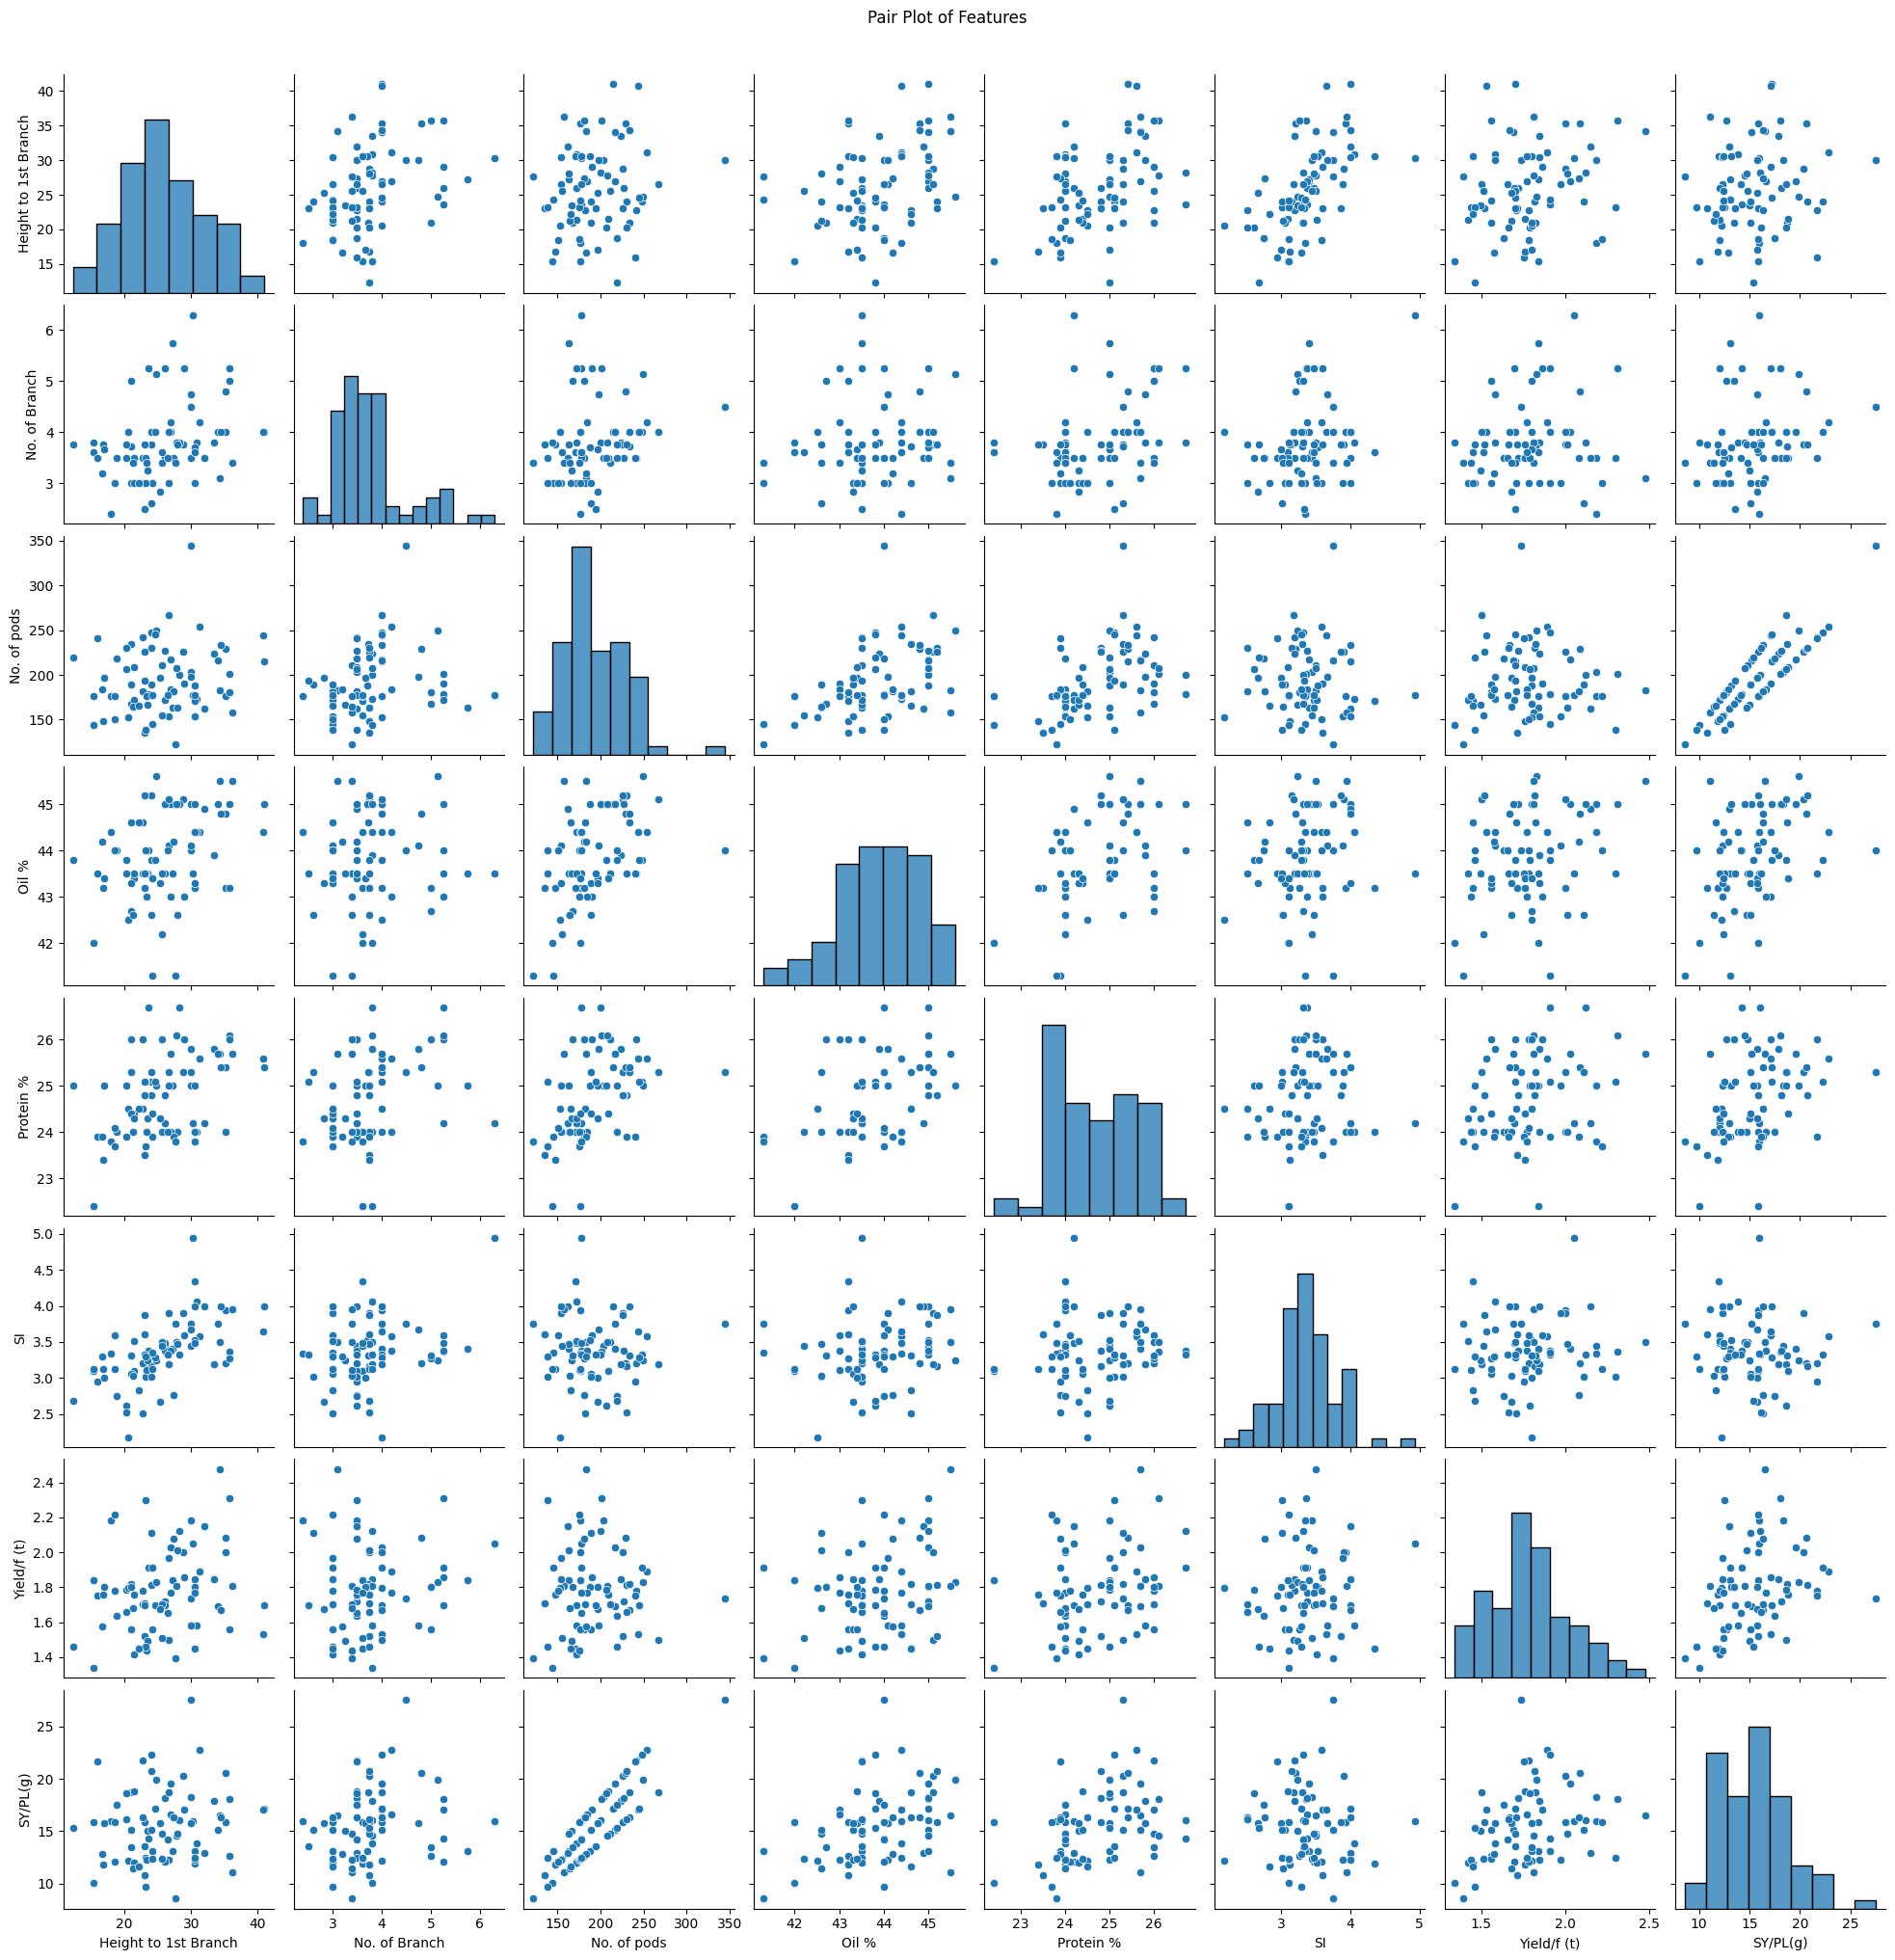

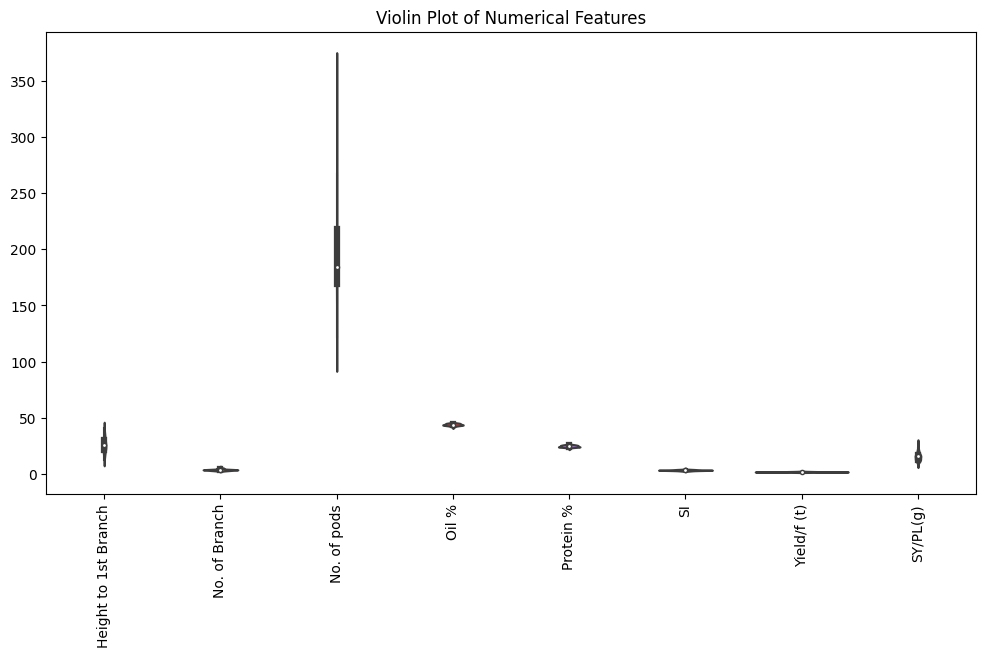

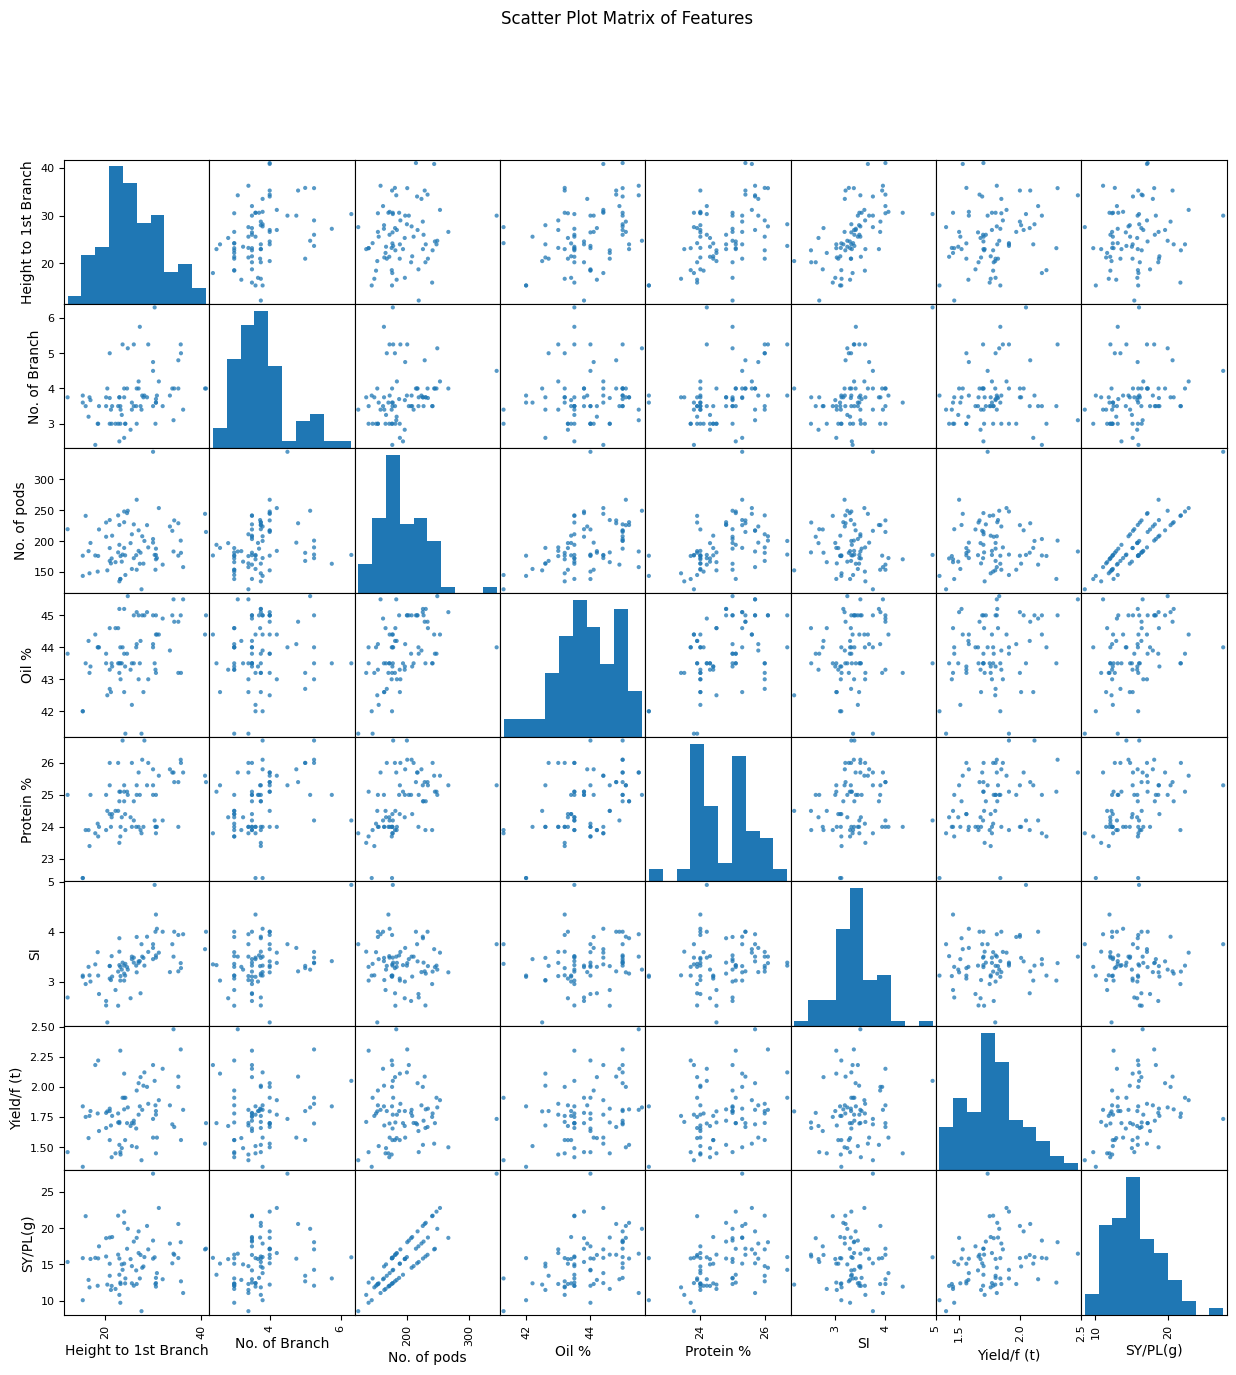

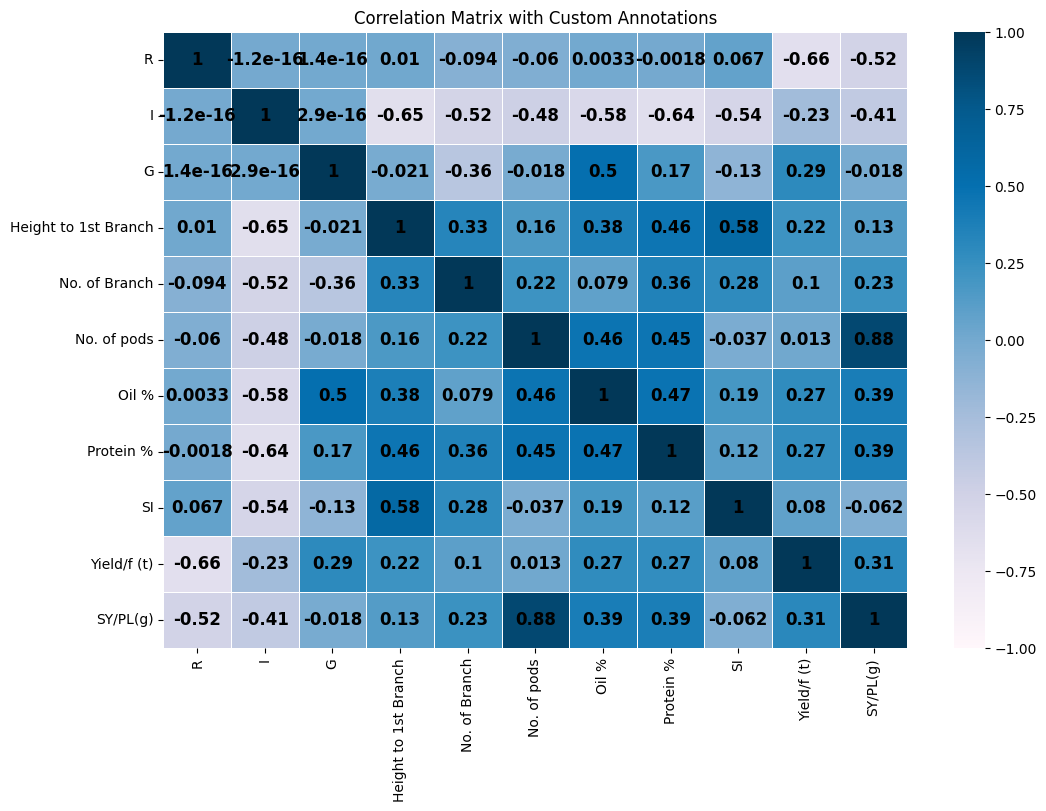

In [7]:
# Correlation matrix
print("\nCorrelation Matrix:")
corr_matrix = df_numeric.corr()
print(corr_matrix)

# Visualizations
# 1. Pair Plot
sns.pairplot(df_numeric.drop(columns=['R', 'I', 'G']))
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

# 2. Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_numeric.drop(columns=['R', 'I', 'G']))
plt.title('Violin Plot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

# 3. Scatter Plot Matrix
pd.plotting.scatter_matrix(df_numeric.drop(columns=['R', 'I', 'G']), figsize=(15, 15), alpha=0.75)
plt.suptitle('Scatter Plot Matrix of Features')
plt.show()

# 4. Correlation Heatmap with Annotated Shapes
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='PuBu', vmin=-1, vmax=1, linewidths=.5,
            annot_kws={"size": 12, "weight": "bold", "color": 'black'})
plt.title('Correlation Matrix with Custom Annotations')
plt.show()

Mean Squared Error: 0.030981206056705714
R^2 Score: 0.6274289255916281


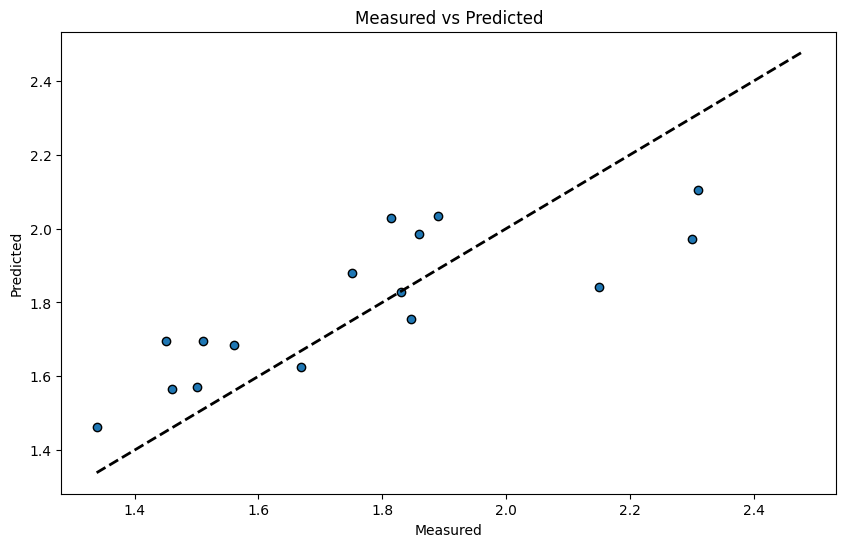

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Drop the categorical column and any identifier columns
df_numeric = df.drop(columns=['Unnamed: 11', 'R', 'I', 'G'])

# Features and target variable
X = df_numeric.drop(columns=['Yield/f (t)'])
y = df_numeric['Yield/f (t)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted')
plt.show()
